In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# Directory and version specifications

In [2]:
from datetime import datetime

MODEL_TIMESTAMP = datetime.now().strftime("%Y-%m-%d__%H-%M-%S")

DATA_PATH = 'data/'

REPORTS_PATH = 'reports/ensembles/'
SAMPLE_GRAPH_RESULTS_PATH  = 'sample_graph_result/ensembles/'
TREE_PATH = 'tree/'

# Resolución de imágenes
resolution = 300

# Download and Store Data

In [3]:
# for index in range(0,22):
#     index_str = str(index)

#     print(index_str)
    
#     if len(index_str) == 1:
#         index_str = '0' + index_str

#     print(index_str)

#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_20{}.csv".format(index_str)
#     print(url)

#     FILE_NAME = "atp_matches_20{}.csv".format(index_str)

#     df = pd.read_csv(url, index_col=0, parse_dates=[0])
#     df.to_csv(DATA_PATH + FILE_NAME)

# # data_frame = pd.read_csv(DATA_PATH + FILE_NAME)

# Load Data

In [4]:
atp = pd.DataFrame()

years_index_20_22 = range(0,22)

for index in years_index_20_22:
    index_str = str(index)

    if len(index_str) == 1:
        index_str = '0' + index_str

    FILE_NAME = "atp_matches_20{}.csv".format(index_str)

    data_frame_iter = pd.read_csv(DATA_PATH + FILE_NAME)
    atp = pd.concat([atp, data_frame_iter])

pd.set_option('display.max_columns', None)
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


In [5]:
# COLUMNS_TO_REMOVE = ["tourney_id", "tourney_name", "tourney_date",
#                      "match_num",
#                      "winner_id", "loser_id",
#                      "winner_seed", "loser_seed",
#                      "winner_name", "loser_name",
#                      "winner_ioc", "loser_loc",
#                      "winner_rank", "loser_rank",
#                      "winner_rank_points", "loser_rank_points",
#                      "round"]

# Clean Dataset

In [6]:
# Vamos a eliminar las variables que son identificadores, nombres etc
# Incluimos en el drop las siguientes variables que tienen muchos registros NaN
# quitaremos las columna de score
df_regression = atp


COLUMNS_TO_REMOVE = ['tourney_id', 'tourney_name', 'tourney_date',
                     'winner_name', 'loser_name',
                     'winner_entry', 'loser_entry',
                     'winner_seed', 'loser_seed',
                     'winner_id', 'loser_id',
                     'score']

df_regression = df_regression.drop(COLUMNS_TO_REMOVE, axis = 1) 
df_regression = df_regression.dropna()
df_regression = df_regression.drop_duplicates()

# Crearemos dos formulas para calculos del ganador y el perdedor para evitar la correlación de estas variables, tambien haremos un drop de estas variables.
df_regression['w_calculation'] = df_regression['w_svpt'] + df_regression['w_1stIn'] + df_regression['w_1stWon'] + df_regression['w_2ndWon'] + df_regression['w_SvGms']
df_regression['l_calculation'] = df_regression['l_svpt'] + df_regression['l_1stIn'] + df_regression['l_1stWon'] + df_regression['l_2ndWon'] + df_regression['l_SvGms']

df_regression = df_regression.drop(['w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms'], axis = 1) 

df_regression = df_regression._get_numeric_data() #drop non-numeric cols

# Split Data

In [7]:
from sklearn.model_selection import train_test_split

X = df_regression.drop('minutes', axis = 1) 
y = df_regression['minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Ensembles

Los ensembles son técnicas que permiten combinar las predicciones de distintos modelos con el objetivo de aumentar la prediccción global de los resultados.
En esta sección aplicaremos distintas técnicas de ensembles y ejecutaremos cada una de ellas al dataset, con el objetivo de predecir la duración de los partidos como se hizo en el apartado de Regresión:

- Ensemble Bagging
- Ensembles Boosting
    - AdaBoost
    - Gradient Boosting Regressor
- Ensemble Stacking

Lo primero será buscar el Árbol de regresión que más accuracy nos dé mediante cross-validation para usarlo en el proceso de Bagging.

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

best_params = {'criterion': 'absolute_error',
               'max_depth': 7,
               'max_features': None,
               'min_weight_fraction_leaf': 0.0,
               'splitter': 'best'}

decision_tree = DecisionTreeRegressor(random_state = 2)
decision_tree.set_params(**best_params)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7, random_state=2)

Inicializamos un diccionario `info` donde almacenaremos toda la información relacionada con los ensembles, sus resultados, su tiempo de ejecución, el nombre del ensemble, etc.

In [9]:
info = {}

## Bagging

Bootstrap Aggregation o Bagging es una técnica que permite utilizar el resampling Bootstrap para consturir ensembles y poder utilizar varios conjuntos de datos para cada uno de los modelos pertenecientes a la arquitectura ensemble diseñada. Los modelos que se utilzarán en esta arquitectura serán todos el mismo, con la única diferencia de haberlos entrenado con distintos conjuntos de datos.

En el caso de la regresión, esta técnica permite calcular la media de las prediccciones de cada uno de los modelos entrenados mediante Bootstrap para obtener un resultado final que dependa de todos los modelos.


[Referencia](https://machinelearningmastery.com/bagging-ensemble-with-python/)

### Definition

Crearemos un Ensemble de tipo Bagging con 10 estimadores, es decir, se entrenarán diez árboles de decisión que predecirán las muestras del conjunto de test y el resultado que ofrecerá será la media de todas las prediciones.

In [10]:
from sklearn.ensemble import BaggingRegressor

MODEL_NAME = 'bagging'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

num_models = 10
bagging = BaggingRegressor(decision_tree,
                           n_estimators = num_models)

### Training

Entrenamos el ensemble Bagging y almacenamos el tiempo de ejecución para analizar en apartados posteriores los rendimientos de los modelos.

In [11]:
start = time.time()

bagging_regressor = bagging.fit(X_train, y_train)

end = time.time()

ellapsed_time = round(end - start, 2)

info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

Done in 496.9 (s)


### Metrics

Las métricas que utilizaremos para medir los errores del modelos serán:
- **Mean Squared Error (MSE)**:  error cuadrático medio, es la suma al cuadrado de los residuos dividido entre el número de muestras totales. Es deseable minimizar este estadístico.
- **Root Mean Squared Error (RMSE)**: raíz del error cuadrático medio, es la raíz cuadrada de la suma de los residuos al cuadrado entre el número de muestras totales. Es deseable minimizar este estadístico.
- **R-Squared**: indica la cantidad de varianza en los datos explicada por el modelo actual. Es deseable maximizar este estadístico.

In [12]:
y_pred = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])

score = bagging_regressor.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score']) 

MSE:  241.60690880531777
RMSE:  15.543709621751102
R-squared: 0.8595738710217888


### Graphic Results

A continuación graficaremos un ejemplo de cómo el modelo se ajusta a los valores verdaderos sobre las muestras del conjunto de test. Es deseable tener un modelo que prediga valores lo más cercanos posibles a las muestras verdaderas.

FileNotFoundError: [Errno 2] No such file or directory: 'sample_graph_result/ensembles/gradientboost/gradientboost_2022-05-04__11-48-06.png'

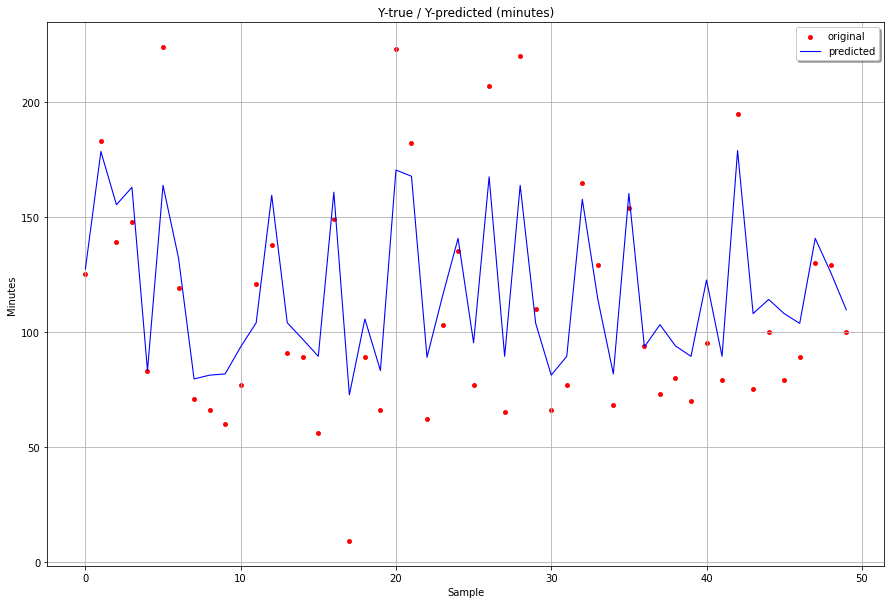

In [20]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

plt.figure(figsize=(15,10))

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'blue', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = resolution)
plt.show()

## Boosting

### ADABoost

AdaBoost utiliza múltiples weak learners (árboles de decisión de un nivel) que son agregados secuencialmente al conjunto de modelos, con el objetivo de que cada uno de estos árboles minimice el error producido por el anterior modelo.

Esto se consigue asignando una serie de pesos (ponderación) a cada una de las muestras que estén clasificadas erróneamente (clasificación) o que tengan un error alto (regresión).

[Referencia](https://machinelearningmastery.com/adaboost-ensemble-in-python/)

#### Definition

Crearemos un Ensemble de tipo AdaBoost con 10 estimadores, es decir, se entrenarán diez árboles de decisión que minimizarán el error de los anteriores árboles.

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

MODEL_NAME = 'adaboost'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

num_models = 10

ada_boosting_regresor = AdaBoostRegressor(random_state = 2)

#### Training

Entrenamos el ensemble Ada Boost y anotamos el tiempo de ejecución.

In [15]:
start = time.time()

ada_boosting_regresor.fit(X, y)

end = time.time()

ellapsed_time = round(end - start, 2)
info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

Done in 6.84 (s)


#### Metrics

Calculamos los estadísticos **MSE**, **RMSE** y **R-Squared**.

In [16]:
y_pred = ada_boosting_regresor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])

score = ada_boosting_regresor.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score']) 

MSE:  475.22022445638095
RMSE:  21.799546427767275
R-squared: 0.7237937571299393


#### Graphic Results

Graficamos un interavalo de predicciones de 50 muestras de test.

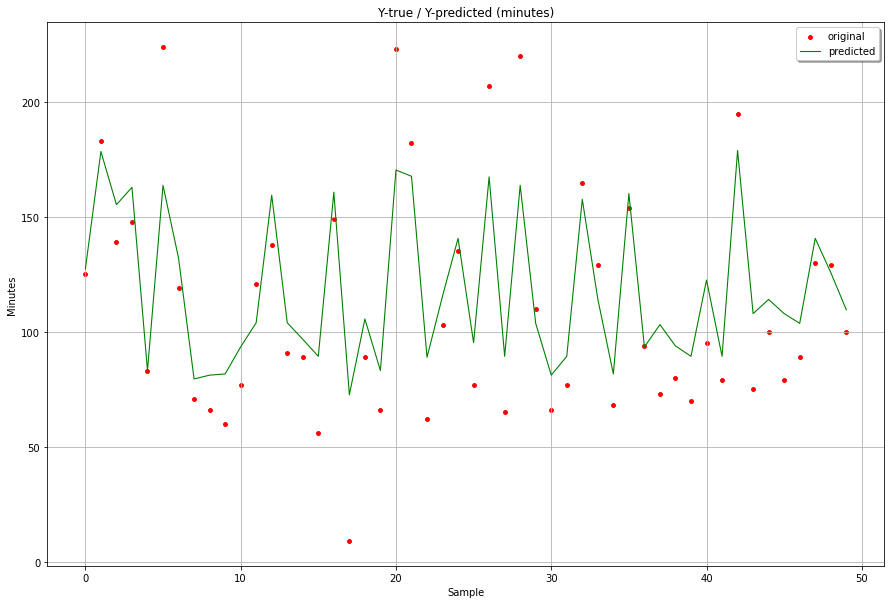

In [17]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

plt.figure(figsize=(15,10))

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'blue', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc='best',fancybox = True, shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}boosting/{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

### Gradient Boosting Regressor

Al igual que en el caso del AdaBoost, utiliza la técnica Boosting para entrenar los modelos, es decir, trata de minimizar los residuos de los modelos anteriores. Sin embargo, utiliza el método de Descenso por Gradiente en lugar de la asignación de pesos como en el caso anterior.

[Referencia](https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html)

#### Definition

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

MODEL_NAME = 'gradientboost'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

num_models = 10

gradient_boosting = GradientBoostingRegressor(criterion = best_params['criterion'],
                                              max_depth = best_params['max_depth'],
                                              n_estimators  = num_models,
                                              random_state = 2)

#### Training

Entrenamos el ensemble Gradient Boosting y anotamos el tiempo de ejecución.

In [19]:
start = time.time()

gradient_boosting_regressor = gradient_boosting.fit(X_train, y_train)

end = time.time()

ellapsed_time = round(end - start, 2)
info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(


KeyboardInterrupt: 

#### Metrics

Calculamos los estadísticos **MSE**, **RMSE** y **R-Squared**.

In [ ]:
y_pred = gradient_boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])

score = gradient_boosting.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score']) 

#### Graphic Results

Graficamos un interavalo de predicciones de 50 muestras de test.

In [ ]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

plt.figure(figsize=(15,10))

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'blue', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc='best',fancybox = True, shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}boosting/{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

## Stacking

Stacking permite utilizar distintas tipologías de modelos para crear una arquitectura que combine las predicciones de éstos.

A diferencia del Bagging, el Stacking nos da la flexibilidad de explorar distintos modelos en lugar de siempre el mismo.

Es por esto que en esta sección crearemos un Ensemble Stacking con los siguientes modelos:
- **KNeighborsRegressor**: configurado con tres vecinos cercanos para calcular la regresión. 
- **DecisionTreeRegressor**: con los parámetros óptimos calculados en el apartado de Regresión.
- **SVR**: con los paráemtros por defecto.

Debido a motivos de tiempo de ejecución, no ha sido posible buscar los mejores hiperparámetros para cada uno de los modelos que pertenecen a la arquitectura de Stacking, por lo que un posible trabajo a futuro sería encontrar estos parámetros que logren minimizar los residuos.

[Referencia](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

### Definition

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor


MODEL_NAME = 'stacking'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

base_models = list()
base_models.append(('knn', KNeighborsRegressor(n_neighbors = 3)))
base_models.append(('cart', DecisionTreeRegressor(criterion = best_params['criterion'],
                                                  max_depth = best_params['max_depth'],
                                                  random_state = 2)))
base_models.append(('svm', SVR()))


meta_learner = DecisionTreeRegressor(criterion = best_params['criterion'],
                                     max_depth = best_params['max_depth'],
                                     random_state = 2)

stacking = StackingRegressor(estimators = base_models,
                             final_estimator = meta_learner,
                             cv = 5)

### Training

Entrenamos el ensemble Stacking y anotamos el tiempo de ejecución.

In [ ]:
start = time.time()

stacking_regressor = stacking.fit(X_train, y_train)

end = time.time()

ellapsed_time = round(end - start, 2)
info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

### Metrics

Calculamos los estadísticos **MSE**, **RMSE** y **R-Squared**.

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])


score = stacking_regressor.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score'])

### Graphic Results

Graficamos un interavalo de predicciones de 50 muestras de test.

In [ ]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

plt.figure(figsize=(15,10))

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'blue', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

# Reports

A continuación analizaremos los resultados de los ensembles obtenidos, centrándonos concretamente en:

- **Tiempo**: tiempo empleado en entrenar el ensemble.
- **Mean Squared Error (MSE)**: Error cuadrático medio de las predicciones respecto a su valor verdadero.
- **Root-mean-square deviation (RMSE)**: Raíz cuadrada del error cuadrático medio o MSE.
- **Score**: Media de la precisión de los modelos.

In [ ]:
FEATURES = ['model_name', 'time', 'mse', 'rmse', 'score']
summary_dataframe = pd.DataFrame(columns = FEATURES)

for key in info:
    row = info[key]
    fields = []
    for feature in row:
        if (feature in FEATURES):
            fields.append(row[feature])

    row_series = pd. Series(fields, index = summary_dataframe.columns)
    summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)

SAVE_PATH =  f"{REPORTS_PATH}{MODEL_TIMESTAMP}.csv"

summary_dataframe.to_csv(SAVE_PATH, index = True)
summary_dataframe.style.highlight_min(subset = ['time', 'mse', 'rmse'], color = 'green')\
                       .highlight_max(subset = ['score'], color = 'green')\
                       .highlight_max(subset = ['time', 'mse', 'rmse'], color = 'red')\
                       .highlight_min(subset = ['score'], color = 'red')


Podemos observar que cada uno de los modelos emplea un tiempo de entrenamiento notablemente diferente. Esto, junto a la distinta precisión entre los modelos, genera la necesidad de analizar cada modelo individualmente.

Como vemos en el reporte, el modelo que mejor resultados nos ofrece es el Bagging, además con un tiempo de ejecución razonable con respecto a los modelos Gradient Boosting y Stacking, no siendo así con respecto al Ensemble AdaBoost, sin embargo, debido a la diferencia de precisión, este modelo queda descartado para este problema. 

Por lo que, con esta configuración de hiperparámetros con los modelos actuales, eligiríamos el modelo Ensemble Bagging como solución a este problema.

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(n_samples, y_test[:50], s = 20, color = 'red', label = "original")

for key in info:
    y_pred = info[key]['y_pred']
    model_name = info[key]['model_name']
    plt.plot(n_samples, y_pred, linewidth = 1.1, label = model_name)

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}/"
FILE_NAME  = f"{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()


Observando la gráfica podemos apreciar dos casos contrapuestos en lo que a valores predichos se refiere.

Si ponemos el foco en el ensemble Stacking (rojo) generalmente toma valores de regresión más cercanos al valor verdadero cuando se trata de partidos por debajo de 75 minutos aproximadamente.

Encontramos también el caso contrario con el ensemble Gradient Boost (verde), que toma generalmente las predicciones más neutras con respecto al resto de ensembles.

# Conclusiones

Como hemos podido comprobar, es posible aplicar distintas técnicas de ensembles a un problema, concretamente:
- Bagging
- Boosting
    - AdaBoost:
    - Gradient Boosting Regressor
- Stacking

Después de haber probado las distintas arquitecturas, los mejores resultados se han obtenido en MEJORMODELO con un RMSE de RMSEMEJOR con respecto a RMSE1 de MODELO1, RMSE2 MODELO2 y RMSE3 del MODELO3 respectivamente.
    

Por motivos de tiempo de ejecución no se han podido testar tantas combinaciones distintas de modelos e hiperparámetros deseadas a la hora de construir los ensembles.

Por lo que se propone como trabajos futuros la implementación y el estudio de distintos modelos en las arquitecturas de los ensembles y realizar una búsqueda más profunda de hiperparámetros que logren minimizar aún más el error producido en la regresión y, por ende, mejorar la precisión de los resultados.